In [ ]:
import shap
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import eli5
shap.initjs()

?shap.TreeExplainer

In [ ]:
?GradientBoostingClassifier.predict_proba()

Object `GradientBoostingClassifier.predict_proba()` not found.


In [3]:
# Read cervical cancer data
penguins = pd.read_csv("../../data/penguins.csv")
penguins = penguins.dropna()

y = (penguins["species"].values == "Adelie").astype(int)
X = penguins.drop(["species", "island", "sex", "year", "rowid"], axis=1)


mod = sk.ensemble.RandomForestClassifier(n_estimators = 5, random_state = 42)
mod.fit(X,y)

explainer = shap.Explainer(mod, X)
shap_values = explainer.shap_values(X)

## Explain Individual Predictions

In [4]:
x = mod.predict_proba(X)[:,1]

In [5]:
np.mean(x)

0.4360360360360361

In [6]:
explainer.expected_value

array([0.526, 0.474])

In [7]:
explainer.expected_value

array([0.526, 0.474])

In [8]:
shap_values.shape

(333, 4, 2)

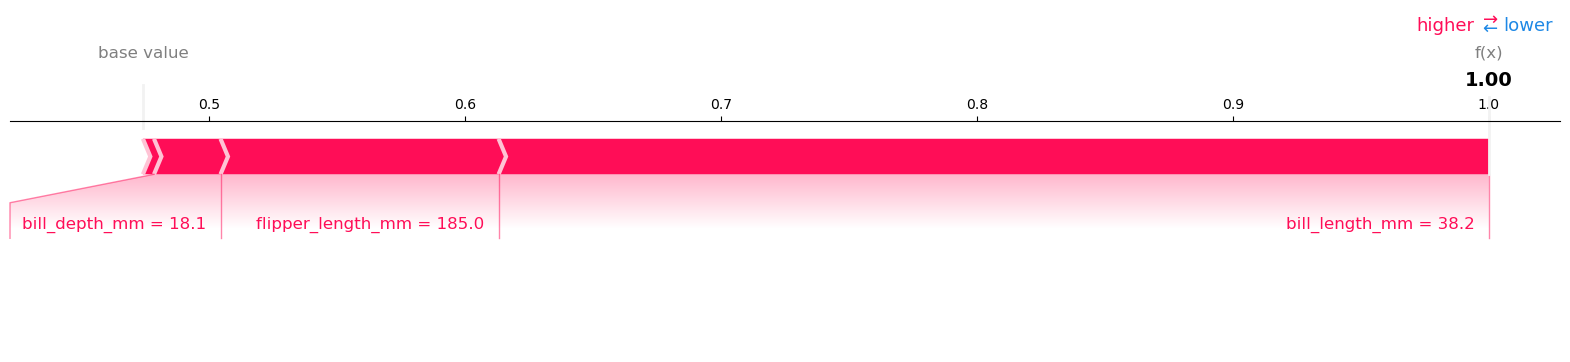

In [9]:
i = 18

# Explain individual predictions
shap.force_plot(explainer.expected_value[1], shap_values[i,:, 1], X.iloc[i,:], matplotlib = True)

In [10]:
shap_values[i][:,1]

array([0.38700001, 0.026     , 0.10866667, 0.00433333])

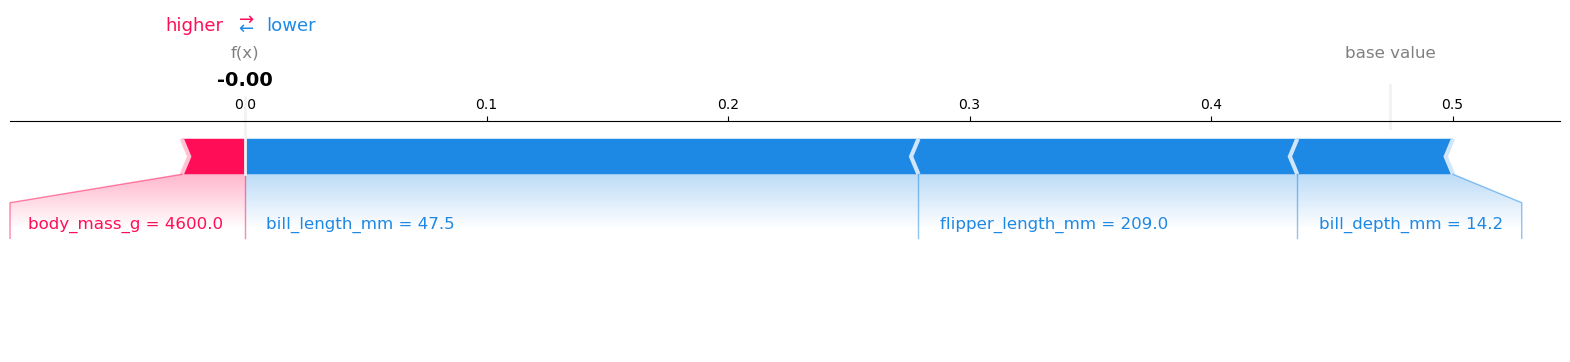

In [11]:
i = 220

# Explain individual predictions
shap.force_plot(explainer.expected_value[1], shap_values[i][:,1], X.iloc[i,:], matplotlib = True, text_rotation = 0)

## Dependence Plots

In [12]:
cmap = plt.get_cmap("viridis", 40)
newcolors = [cmap(0.),  cmap(0.8), cmap(0.8)]
cmap2 = ListedColormap(newcolors)

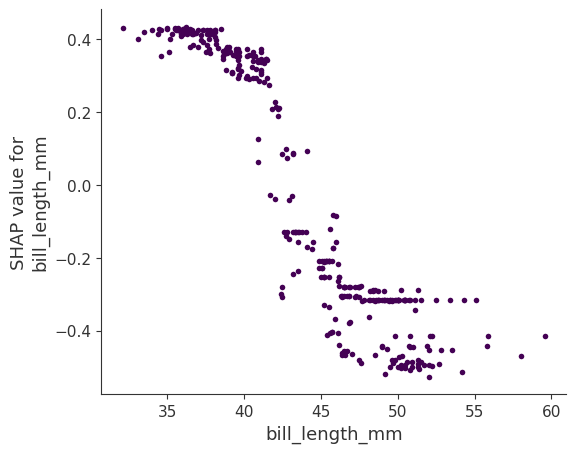

In [13]:
# Feature Effect
shap.dependence_plot("bill_length_mm", shap_values[:, :, 1], X, interaction_index=None, color = cmap2.colors[0])

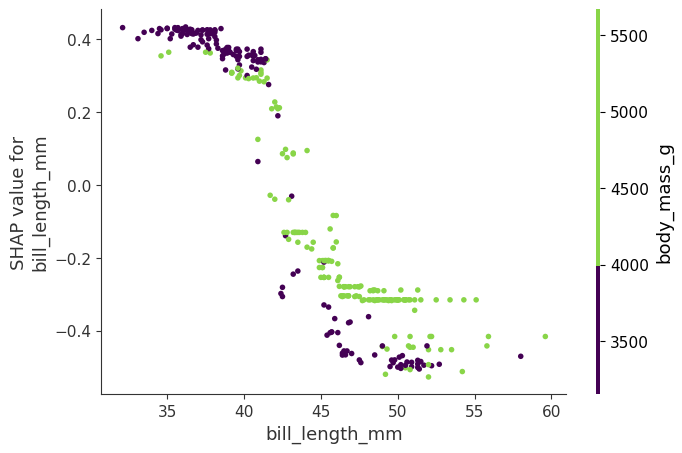

In [14]:
# Feature Effect with auto interaction detection
shap.dependence_plot("bill_length_mm", shap_values[:, :, 1], X, cmap=cmap2)

## Summary Plots / Clustering

In [15]:
# Plot instance clustering
shap.force_plot(explainer.expected_value[1], shap_values[:,:,1], X)

# Feature Importance

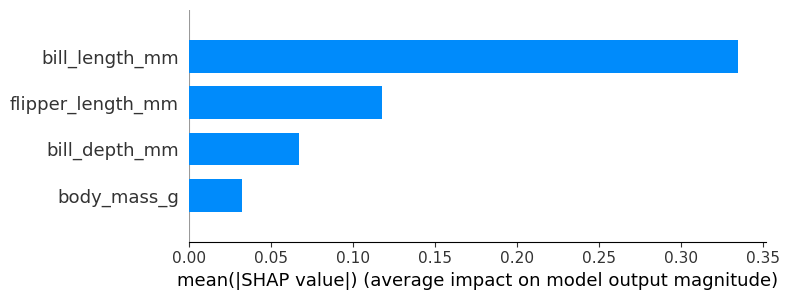

In [16]:
# Plot feature importance
shap.summary_plot(shap_values[:,:,1], X, plot_type = "bar")

Compare with permutation feature importance

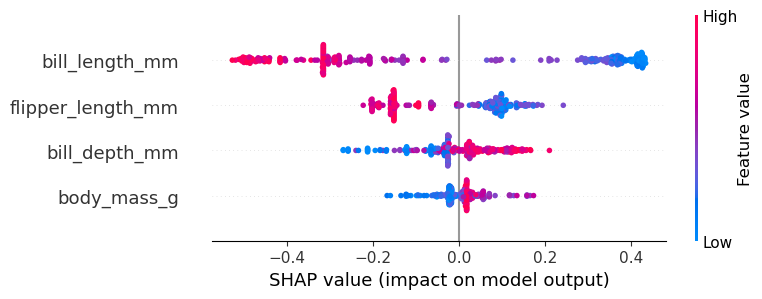

In [17]:
shap.summary_plot(shap_values[:,:,1], X)

# More interactions

In [ ]:
shap_ia = explainer.shap_interaction_values(X, y)